# Import library untuk cleansing data teks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_preprocess.tsv.txt',sep='\t', names= ['Kalimat','label'])
df

,Kalimat,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


## drop data yang duplicate

In [ ]:
df.duplicated().sum()

67

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(10933, 2)

In [ ]:
df.isnull().sum()

Kalimat    0
label      0
dtype: int64

In [ ]:
df.label.value_counts()

positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64

# Visualisasi data training yang belum di cleansing menggunakan wordcloud

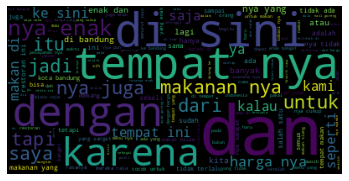

In [ ]:
# Visualisasi Wordcloud
from wordcloud import WordCloud
text =' '.join(df['Kalimat'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Melakukan  Cleansing data 

In [ ]:
### text normalization
def regex(text):
    text = re.sub('k212',' ', text)
    text = re.sub('USER',' ', text) #Remove USER
    text = re.sub('URL', ' ', text) #Remove URL
    text = re.sub(r'\\n+', ' ', text) #Remove \n
    text = re.sub(r'https\S+', ' ', text) #Remove hppts
    text = re.sub(r'\\x[A-Za-z0-9./]+', ' ', text) #Remove \x96 ect
    text = re.sub('#[A-Za-z0-9./]+',' ', text) #Remove hastag
    text = re.sub(' +',' ', text) #Remove extra space
    text = text.lower() #Lowercase text
    text = re.sub(r'[^a-zA-Z0-9]',' ', text) #Remove non alpha numeric
    return text

### Menghilangkan kata alay

In [ ]:
### text normalization
alay_dict = pd.read_csv('/content/drive/MyDrive/new_kamusalay.csv', encoding='latin-1',header=None)
alay_dict = alay_dict.rename(columns={0: 'Original', 1: 'Arti'})
def normalize_alay(text):
  alay_dict_map = dict(zip(alay_dict['Original'], alay_dict['Arti']))
  return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [ ]:
alay_dict.head()

,Original,Arti
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


### Menghilangkan imbuhan 

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 

stem = StemmerFactory()
stemmer = stem.create_stemmer()

In [ ]:
def stemming(text):
    return stemmer.stem(text)

### Menghilangkan kata yang tidak bermakna

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch
list_stopwords= stopwords_scratch.words('indonesian')
list_stopwords.extend(['sih','nya', 'iya', 'nih', 'biar', 'tau', 'kayak', 'banget','ya','gue','rt','RT','amp'])
stopwords=list_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove words that are in NLTK stopwords list
not_stopwords = {'tidak'} 
final_stop_words = set([word for word in stopwords if word not in not_stopwords])

print(final_stop_words)

{'antara', 'kelihatan', 'lagi', 'inikah', 'kelima', 'semata-mata', 'dipersoalkan', 'bolehlah', 'bilakah', 'menyangkut', 'tiba', 'terdahulu', 'mengungkapkan', 'dalam', 'kamulah', 'semisal', 'menegaskan', 'sekurang-kurangnya', 'turut', 'ikut', 'banyak', 'yakni', 'antar', 'jadilah', 'meskipun', 'ditandaskan', 'menanti-nanti', 'seluruh', 'masih', 'tentang', 'sejauh', 'kalaulah', 'ditunjukkan', 'akankah', 'katanya', 'menyiapkan', 'diibaratkannya', 'seseorang', 'termasuk', 'bagaikan', 'bersama', 'mempersoalkan', 'justru', 'RT', 'setiap', 'sebagian', 'harus', 'memihak', 'dua', 'dilihat', 'tengah', 'awalnya', 'terus', 'sekalipun', 'depan', 'menanyakan', 'menanya', 'dikira', 'guna', 'aku', 'haruslah', 'disebut', 'diingatkan', 'segalanya', 'sempat', 'mana', 'jawaban', 'terasa', 'sebagainya', 'berakhirlah', 'segera', 'karenanya', 'ini', 'lah', 'manakala', 'selanjutnya', 'kelamaan', 'sering', 'masihkah', 'bawah', 'ucapnya', 'bagaimanapun', 'masing-masing', 'saya', 'tetap', 'se', 'namun', 'dan', 'm

In [ ]:
def remove_stopword(text):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in final_stop_words): # remove punctuation
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return " ".join(tweets_clean)

In [ ]:
def cleansing(text):
    text = regex(text)
    text = normalize_alay(text)
    text = remove_stopword(text)
    text = stemming(text)
    return text

In [ ]:
df['kalimat_clean']=df['Kalimat'].apply(cleansing)

In [ ]:
df

,Kalimat,label,kalimat_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus hujjah partai pilih suara is...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
...,...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,f demokrat dorong upaya mandiri energi nasional
10994,tidak bosan,positive,tidak bosan
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak masakan kepiting senang pilih kepiting se...
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi tol pasteur macet parah bikin jengkel


In [ ]:
df.isna().sum() #cek data apakah masih ada yang missing value atau tidak

Kalimat          0
label            0
kalimat_clean    0
dtype: int64

## Visualisasi data cleansing menggukan wordcloud

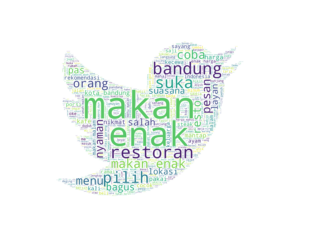

In [ ]:
# Visualisasi Wordcloud
from PIL import Image
import numpy as np
from wordcloud import WordCloud

text =' '.join(df['kalimat_clean'])
mask = np.array(Image.open('/content/drive/MyDrive/twitter bird.jpeg'))
wordcloud = WordCloud(stopwords=list_stopwords, width=2000,height=1000,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42).generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word in Positive Statement

In [ ]:
df_positive = df[df['label']=="positive"]
df_positive

,Kalimat,label,kalimat_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung milik usaha pabrik puluh kenal putih ba...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus tet...
5,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall 10 kasir sua...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,unik bagus foto makan enak pegawai ramah bersi...
...,...,...,...
10990,datang ke sini sore hari pakai baju agak tebal...,positive,sore pakai baju tebal dingin kurang akses suli...
10992,kalau memang jala nya sudah begitu terima saja...,positive,jala terima ikhlas
10994,tidak bosan,positive,tidak bosan
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak masakan kepiting senang pilih kepiting se...


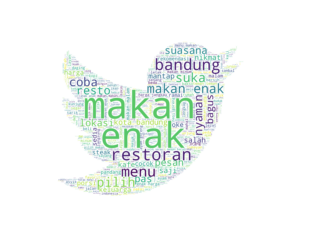

In [ ]:
# Visualisasi Wordcloud
text =' '.join(df_positive['kalimat_clean'])
mask = np.array(Image.open('/content/drive/MyDrive/twitter bird.jpeg'))
wordcloud = WordCloud(stopwords=list_stopwords, width=2000,height=1000,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42).generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word in Negative Statement

In [ ]:
df_negative = df[df['label']=="negative"]
df_negative

,Kalimat,label,kalimat_clean
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit baca tidak untung rugi
10,simcard indosat inaktiv gara-gara lupa isi pul...,negative,simcard indosat inaktiv gara gara lupa isi pul...
11,sifat iri sering muncul pada orang orang yang ...,negative,sifat iri muncul orang orang tidak tuju hidup
13,"pengalaman bersama indosat hari ini , semoga t...",negative,alam indosat moga tidak langgan marah marah la...
...,...,...,...
10982,tolong dibaca pesan saya ! di dalam kotak hand...,negative,tolong baca pesan kotak handphone tidak kartu ...
10985,"sumpah gue kecewa banget dengan sms , cuma tea...",negative,sumpah kecewa sms teaser doang isi got 7 eh pa...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,antar teman resto hit bandung rekomendasi ah s...
10991,dapat rom awal abad,negative,rom abad


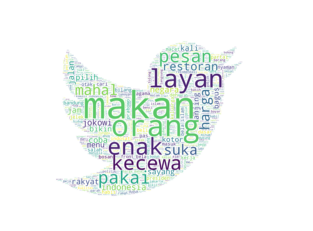

In [ ]:
# Visualisasi Wordcloud
from PIL import Image
import numpy as np
from wordcloud import WordCloud

text =' '.join(df_negative['kalimat_clean'])
mask = np.array(Image.open('/content/drive/MyDrive/twitter bird.jpeg'))
wordcloud = WordCloud(stopwords=list_stopwords, width=2000,height=1000,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42).generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word in Neutal Statement

In [ ]:
df_neutral = df[df['label']=="neutral"]
df_neutral

,Kalimat,label,kalimat_clean
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus hujjah partai pilih suara is...
16,setiap bumn dibentuk dengan uu bukan dibentuk ...,neutral,badan usaha milik negara bentuk undang undang ...
28,pdip sebut ridwan kamil menang karena berbaju ...,neutral,partai demokrasi indonesia juang ridwan kamil ...
32,08:30 : kedatangan presiden ri dan rombongan d...,neutral,08 30 datang presiden ri rombong gate 2 termin...
37,risma menjatuhkan pilihan nya pada gus ipul - ...,neutral,risma jatuh pilih gus ipul puti pilih gubernur...
...,...,...,...
10881,demokrat umumkan calon gubri jagoan di menit t...,neutral,demokrat umum calon gubri jago menit
10925,pkb benarkan charly setia band daftar jadi caw...,neutral,partai bangkit bangsa benar charly setia band ...
10967,pernah percaya kalau body lotion citra bikin b...,neutral,percaya body lotion citra bikin bulu
10969,"bu susi marah , menteri luhut perbolehkan kapa...",neutral,bu sus marah menteri luhut boleh kapal asing c...


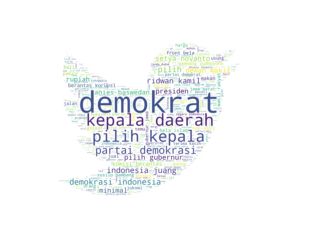

In [ ]:
# Visualisasi Wordcloud
text =' '.join(df_neutral['kalimat_clean'])
mask = np.array(Image.open('/content/drive/MyDrive/twitter bird.jpeg'))
wordcloud = WordCloud(stopwords=list_stopwords, width=2000,height=1000,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42).generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Klasifikasi data

In [ ]:
neg = df.loc[df['label']=='negative'].kalimat_clean.tolist()
neu = df.loc[df['label']=='neutral'].kalimat_clean.tolist()
pos = df.loc[df['label']=='positive'].kalimat_clean.tolist()

neg_label = df.loc[df['label']=='negative'].label.tolist()
neu_label = df.loc[df['label']=='neutral'].label.tolist()
pos_label = df.loc[df['label']=='positive'].label.tolist()

total_data = neg + neu + pos
labels = neg_label + neu_label + pos_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data : %s" % len(total_data))

Pos: 6383, Neu: 1138, Neg: 3412
Total data : 10933


In [ ]:
classes = df['label']
Z = classes
Z

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10993     neutral
10994    positive
10996    positive
10998    negative
10999    positive
Name: label, Length: 10933, dtype: object

In [ ]:
df_label = pd.DataFrame(Z.value_counts()).reset_index().rename(columns={"index": "label"})
df_label.columns.values[1]='Count'
display(df_label)

,label,Count
0,positive,6383
1,negative,3412
2,neutral,1138


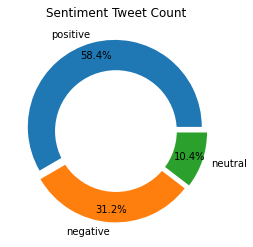

In [ ]:
import matplotlib.pyplot as plt

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df_label['Count'], labels=df_label['label'],
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Sentiment Tweet Count')

# Displaying Chart
plt.show()


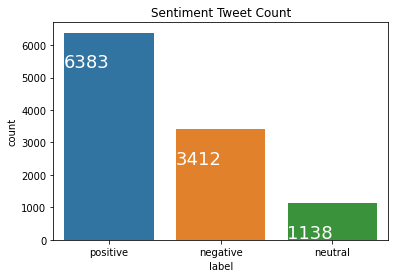

In [ ]:
import seaborn as sns
ax = sns.countplot(x=df["label"],order = df["label"].value_counts(ascending=False).index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title('Sentiment Tweet Count')
plt.show()

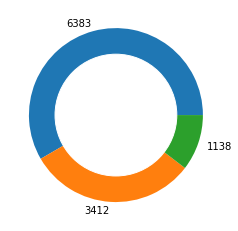

In [ ]:
data = df['label'].value_counts()
explode = (0, 0, 0)
plt.pie(data, explode = explode, labels = [round(i,2) for i in (list(data))])
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

## Melakukan Featur ekstraksi menggukan modul tokenizer dan pad_sequences

In [ ]:
#feature extraction
import pickle # library menyimpan model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 10000
tokenizer = Tokenizer(num_words= max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)

with open('/content/drive/MyDrive/Binar/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")
    
X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen= max(len(x) for x in X)

X = pad_sequences(X)
with open('/content/drive/MyDrive/Binar/x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle,protocol=pickle.HIGHEST_PROTOCOL)
    print("X_pad_sequences has created!")

tokenizer.pickle has created!
X_pad_sequences has created!


In [ ]:
with open('/content/drive/MyDrive/Binar/x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle,protocol=pickle.HIGHEST_PROTOCOL)
    print("X_pad_sequences has created!")

X_pad_sequences has created!


In [ ]:
X

array([[   0,    0,    0, ..., 1452,  273,  314],
       [   0,    0,    0, ...,    2,  425,  679],
       [   0,    0,    0, ..., 3748,  120, 1034],
       ...,
       [   0,    0,    0, ...,    0,    2,  199],
       [   0,    0,    0, ...,   79,  153,    5],
       [   0,    0,    0, ...,   86,  747,    1]], dtype=int32)

In [ ]:
#memasukkan label datanya ke variable Y
Y = pd.get_dummies(labels)
Y = Y.values

with open('/content/drive/MyDrive/Binar/y_labels.pickle','wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_label.pickle has created1!")

y_label.pickle has created1!


In [ ]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

## Training Data dengan perbandingan 80% data training, 20% data test

In [ ]:
#membagi (split) data dimana 80% data untuk train 20% data untuk test
from sklearn.model_selection import train_test_split

file = open("/content/drive/MyDrive/Binar/x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/Binar/y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[   0,    0,    0, ...,    2, 3218,  909],
       [   0,    0,    0, ...,  222,   65,   13],
       [   0,    0,    0, ...,   12,  321,    9],
       ...,
       [   0,    0,    0, ...,   20,   32, 1122],
       [   0,    0,    0, ..., 1312,  430, 4276],
       [   0,    0,    0, ...,  624,  511,  320]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ..., 1875, 4487,   20],
       [   0,    0,    0, ...,    1,   28,    3],
       [   0,    0,    0, ..., 3968, 2960,   14],
       ...,
       [   0,    0,    0, ...,  306, 3949,  233],
       [   0,    0,    0, ...,  430,  370,  428],
       [   0,    0,    0, ...,  334, 4124, 2060]], dtype=int32)

In [ ]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [ ]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

## Melakukan cross valdation 

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

from sklearn.model_selection import GridSearchCV


In [ ]:
embed_dim = 32
units = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='RMSprop',metrics = ['accuracy'])
print(model.summary())

rmsprop = optimizers.RMSprop(learning_rate = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])
#es = EarlyStopping(monitor='val_loss',mode='min', verbose=0)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 67, 32)            320000    
                                                                 
 lstm_29 (LSTM)              (None, 32)                8320      
                                                                 
 dense_29 (Dense)            (None, 3)                 99        
                                                                 
Total params: 328,419
Trainable params: 328,419
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
137/137 [==============================] - 16s 98ms/step - loss: 0.5853 - accuracy: 0.7638 - val_loss: 0.4732 - val_accuracy: 0.8125
Epoch 2/10
137/137 [==============================] - 7s 50ms/step - loss: 0.3451 - accuracy: 0.8731 - val_loss: 0.3910 - val_accuracy: 0.8509
Epoch 3/10
137/137 

## Hyperparameter Tunning

In [ ]:
'''def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model
    
embed_dim = 16
units = 16

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(LSTM(units, activation = 'tanh', dropout=0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
print(model.summary())'''

"def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):\n    model = Sequential()\n    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))\n    model.add(LSTM(units = hidden_unit, activation = 'tanh'))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(units = 3, activation = 'softmax'))\n    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])\n    print(model.summary())\n    return model\n    \nembed_dim = 16\nunits = 16\n\nmodel = Sequential()\nmodel.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))\nmodel.add(LSTM(units, activation = 'tanh', dropout=0.2))\nmodel.add(Dense(3, activation = 'softmax'))\nmodel.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])\nprint(model.summary())"

In [ ]:
'''# Create the model with the best hyperparameter which has been determined
model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 32,
                        hidden_unit = 16,
                        optimizers = RMSprop,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=10, 
                        batch_size=128,
                        # Initiate validation data, which is 10% data from data train. It's used for evaluation model
                        validation_split = 0.1)
# Hyperparameter tuning (to know the best hyperparameter for this model)

# Wrapper model with default hyperparameter values
model = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) 

# Hyperparameters
embed_dim = [32, 64]
hidden_unit = [16, 32, 64]
dropout_rate = [0.2]
optimizers = [Adam, RMSprop]
learning_rate = [0.01, 0.001, 0.0001]
epochs = [10, 25, 50, 100]
batch_size = [128, 256]
param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,
                  learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# Evaluation model with GridSearchCV to know what the best hyperparameter for model 
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid_result = grid.fit(X_train, y_train)

# results = pd.DataFrame()
# results['means'] = grid_result.cv_results_['mean_test_score']
# results['stds'] = grid_result.cv_results_['std_test_score']
# results['params'] = grid_result.cv_results_['params']
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# results.to_csv(r'gridsearchcv_results.csv', index = False, header = True)
# results.sort_values(by='means', ascending = False).reset_index(drop=True)

search_space = (
    "n_estimators" : [100,200,500],
    "max_depth": [3,6,9],
    

)'''

'# Create the model with the best hyperparameter which has been determined\nmodel = KerasClassifier(build_fn = create_model,\n                        # Model Parameters\n                        dropout_rate = 0.2,\n                        embed_dim = 32,\n                        hidden_unit = 16,\n                        optimizers = RMSprop,\n                        learning_rate = 0.001,\n                   \n                        # Fit Parameters\n                        epochs=10, \n                        batch_size=128,\n                        # Initiate validation data, which is 10% data from data train. It\'s used for evaluation model\n                        validation_split = 0.1)\n# Hyperparameter tuning (to know the best hyperparameter for this model)\n\n# Wrapper model with default hyperparameter values\nmodel = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) \n\n# Hyperparameters\nembed_dim = [32, 64]\nhidden_unit = [16, 32, 64]\ndropout_rate = [0

## Memvisualisasikan Confusion Matrix 

In [ ]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 1s 10ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       665
           1       0.75      0.70      0.73       235
           2       0.90      0.91      0.91      1287

    accuracy                           0.86      2187
   macro avg       0.82      0.81      0.81      2187
weighted avg       0.85      0.86      0.85      2187



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'neutral','positive'])

In [ ]:
confusion_matrix

array([[ 534,   32,   99],
       [  45,  165,   25],
       [  93,   23, 1171]])

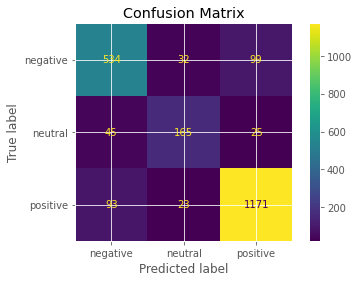

In [ ]:
import matplotlib.pyplot as plt

cm.plot()
plt.title("Confusion Matrix")
plt.show()

## Evaluasi model yang sudah dibuat

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

kf = KFold(n_splits=5,random_state=69,shuffle=True)

accuracies = []
score_f1 = []
preci = []
rcall = []

y = Y

embed_dim = 32
units= 32

for iteration, data in enumerate(kf.split(X), start=1):
    
    data_train   = X[data[0]]
    target_train = y[data[0]]
    
    data_test    = X[data[1]]
    target_test  = y[data[1]]
    
    model= Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss = 'binary_crossentropy', optimizer='RMSprop',metrics = ['accuracy'])
    
    rmsprop= optimizers.RMSprop(lr = 0.003)
    model.compile(loss= 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])
    
    #es = EarlyStopping(monitor='val_loss',mode='min', verbose=0)
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data= (X_test, y_test), verbose=0)#, callbacks=[es])
    
    predictions = model.predict(X_test)
    y_pred = predictions
    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    f1 = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), pos_label = ['positive','negative','neutral'], average='macro')
    precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), pos_label = ['positive','negative','neutral'], average='macro')
    re_call = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), pos_label = ['positive','negative','neutral'], average='macro')
    
    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    #print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("=======================================================")
    
    accuracies.append(accuracy)
    score_f1.append(f1)
    preci.append(precision)
    rcall.append(re_call)
    
average_accuracy = np.mean(accuracies)
average_f1 = np.mean(score_f1)
average_precision = np.mean(preci)
average_recall= np.mean(rcall)

print()
print()
print()
print("Rata-rata Accuracy  : ", average_accuracy)
print("Rata-rata F1-score  : ", average_f1)
print("Rata-rata precision : ", average_precision)
print("Rata-rata recall    : ", average_recall)

69/69 [==============================] - 2s 10ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       665
           1       0.71      0.81      0.76       235
           2       0.92      0.90      0.91      1287

    accuracy                           0.86      2187
   macro avg       0.82      0.84      0.83      2187
weighted avg       0.87      0.86      0.86      2187



69/69 [==============================] - 2s 17ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       665
           1       0.74      0.78      0.76       235
           2       0.90      0.92      0.91      1287

    accuracy                           0.87      2187
   macro avg       0.83      0.83      0.83      2187
weighted avg       0.86      0.87      0.86      2187



69/69 [==============================] - 1s 10ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       665
           1       0.77      0.76      0.76       235
           2       0.92      0.90      0.91      1287

    accuracy                           0.86      2187
   macro avg       0.83      0.83      0.83      2187
weighted avg       0.86      0.86      0.86      2187



69/69 [==============================] - 1s 10ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       665
           1       0.70      0.86      0.77       235
           2       0.94      0.88      0.91      1287

    accuracy                           0.86      2187
   macro avg       0.81      0.86      0.83      2187
weighted avg       0.87      0.86      0.86      2187



69/69 [==============================] - 1s 10ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       665
           1       0.76      0.73      0.75       235
           2       0.91      0.93      0.92      1287

    accuracy                           0.87      2187
   macro avg       0.83      0.82      0.82      2187
weighted avg       0.86      0.87      0.87      2187




Rata-rata Accuracy  :  0.8632830361225423
Rata-rata F1-score  :  0.8264888988809383
Rata-rata precision :  0.8215457294887205
Rata-rata recall    :  0.833606302452887


## Save model

In [ ]:
model.save('/content/drive/MyDrive/Binar/model1.h5')
print("Model has created")

Model has created


## Predict kalimat

In [ ]:
from keras.models import load_model
import re
sentiment=['negative','neutral','positive']
input_text='''tidak bosan'''
text=[cleansing(input_text)]
predicted=tokenizer.texts_to_sequences([text])
guess=pad_sequences(predicted,maxlen=X.shape[1])
model=load_model('/content/drive/MyDrive/Binar/model1.h5')
prediction=model.predict(guess)
polarity=np.argmax(prediction)
print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 836ms/step
Text:  tidak bosan
Sentiment:  positive


In [ ]:
from keras.models import load_model
import re
sentiment=['negative','neutral','positive']
input_text='''sayas sangat bahagia hari ini'''
text=[regex(input_text)]
predicted=tokenizer.texts_to_sequences([text])
guess=pad_sequences(predicted,maxlen=X.shape[1])
model=load_model('/content/drive/MyDrive/Binar/model1.h5')
prediction=model.predict(guess)
polarity=np.argmax(prediction)
print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 907ms/step
Text:  sayas sangat bahagia hari ini
Sentiment:  positive


In [ ]:
from keras.models import load_model
import re
sentiment=['negative','neutral','positive']
input_text='''bogor akan dipimpin kembali oleh bima arya '''
text=[cleansing(input_text)]
predicted=tokenizer.texts_to_sequences([text])
guess=pad_sequences(predicted,maxlen=X.shape[1])
model=load_model('/content/drive/MyDrive/Binar/model1.h5')



polarity=np.argmax(model)
print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

Text:  bogor pimpin bima arya
Sentiment:  negative


# Visualisasi data antara data training dan data test

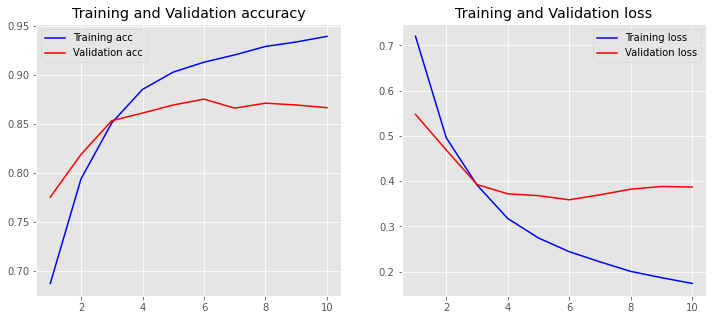

In [ ]:
# history. history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x,val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    
%matplotlib inline 
plot_history(history)